In [54]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import json
import xmltodict
import pandas as pd

url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'n+Owc2NrKuWwnL8KZguOwU+e6V/N+daQW96x+HaqRxD9qwvh6PrF4RPbzdl5P2JGtmQDnMmN1nkeNayTwuTaeg==',
                               quote_plus('pageNo') : '1',
                               quote_plus('numOfRows') : '10',
                               quote_plus('startCreateDt') : '20210101',
                               quote_plus('endCreateDt') : '20210401' })

request = Request(url + queryParams)
request.get_method = lambda: 'GET'
u = urlopen(request)
response_body = u.read()

In [55]:
result = xmltodict.parse(response_body)
json_val = json.dumps(result, indent=4)

In [47]:
with open("val.json","w", encoding = 'utf-8') as f:
    f.write(json_val)
f.close()

In [48]:
with open("val.json", "r") as f:
    data= json.load(f)
f.close()

In [49]:
data['response']['body']['items']['item'][0]

{'accDefRate': '1.4755317026',
 'accExamCnt': '5061279',
 'accExamCompCnt': '4901894',
 'careCnt': '12827',
 'clearCnt': '58253',
 'createDt': '2021-01-17 15:27:58.692',
 'deathCnt': '1249',
 'decideCnt': '72329',
 'examCnt': '159385',
 'resutlNegCnt': '4829565',
 'seq': '487',
 'stateDt': '20210117',
 'stateTime': '00:00',
 'updateDt': '2021-04-20 15:29:06.35'}

In [50]:
df = pd.DataFrame(data['response']['body']['items']['item'])

In [51]:
df = df[['seq','stateDt','stateTime','decideCnt','clearCnt','examCnt',
         'deathCnt','careCnt','resutlNegCnt','accExamCnt','accExamCompCnt','accDefRate','createDt','updateDt']]

In [52]:
df = df.rename(columns = {'seq':'게시글번호','stateDt':'기준일','stateTime':'기준시간',
                          'decideCnt':'확진자 수','clearCnt':'격리해제 수','examCnt':'검사진행 수',
                          'deathCnt':'사망자 수','careCnt':'치료중 환자 수','resutlNegCnt':'결과 음성 수',
                          'accExamCnt':'누적 검사 수','accExamCompCnt':'누적 검사 완료 수','accDefRate':'누적 확진률',
                          'createDt':'등록일시분초','updateDt':'수정일시분초'})

In [53]:
df.to_csv("result.csv",encoding='utf-8-sig')

In [56]:
import matplotlib.pyplot as plt

In [64]:
df['기준일'] = pd.to_numeric(df['기준일'])

In [65]:
df['확진자 수'] = pd.to_numeric(df['확진자 수'])

<AxesSubplot:xlabel='기준일'>

C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tens_2gpu\lib\site-package

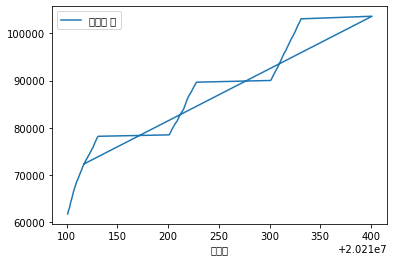

In [73]:
df.plot(kind='line',x='기준일', y='확진자 수')

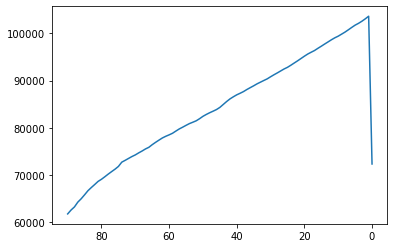

In [76]:
plt.plot(df['확진자 수'])
plt.gca().invert_xaxis()